

# Data Analysis Project: Supply Chain Dataset

## Introduction

In this project, we analyze a comprehensive supply chain dataset to derive insights related to product type performance, customer demographics, and operational efficiency. The dataset includes various columns such as product type, SKU, price, availability, and inspection results, allowing us to explore relationships and trends within the data.

### Objective

The main objectives of this analysis are to:
1. **Understand Product type Performance**: Evaluate the sales performance of different product types and identify trends in revenue generation.
2. **Analyze Customer Demographics**: Explore how customer demographics influence purchasing behavior and product preferences.
3. **Assess Operational Efficiency**: Investigate lead times, shipping costs, and defect rates to identify areas for improvement in the supply chain process.
4. **Visualize Data**: Create visual representations of key metrics to facilitate better understanding and communication of findings.

### Steps

The data wrangling and cleaning process involves the following steps:

1. **Data Loading**: Import the dataset using Pandas and display the first few rows to understand its structure.
2. **Initial Exploration**:
   - Check the shape of the dataset.
   - Identify and handle any duplicate entries.
   - Review data types and summary statistics.
   - Examine unique values in categorical columns to understand the data better.
3. **Data Cleaning**:
   - Rename columns for clarity and consistency.
   - Generate box plots for numerical columns to identify outliers and understand data distribution.
4. **Export Cleaned Data**: Save the cleaned dataset for further analysis.

By following these steps, we aim to prepare the data for a more in-depth analysis using another tool (SQl &Tableau), ultimately leading to actionable insights for improving supply chain operations.



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the supply chain dataset
df = pd.read_csv("/content/supply_chain_data (Original Data ).csv")

Data Wrangling and cleaning

In [20]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [21]:
df.shape

(100, 24)

In [22]:
df.duplicated().any()

False

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [24]:
df["Product type"].unique()


array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [25]:
df["Customer demographics"].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [26]:
df["Shipping carriers"].unique()

array(['Carrier B', 'Carrier A', 'Carrier C'], dtype=object)

In [27]:
df["Supplier name"].unique()

array(['Supplier 3', 'Supplier 1', 'Supplier 5', 'Supplier 4',
       'Supplier 2'], dtype=object)

In [28]:
df["Location"].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

In [29]:
df["Inspection results"].unique()

array(['Pending', 'Fail', 'Pass'], dtype=object)

In [30]:
df["Transportation modes"].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

In [31]:
df["Routes"].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

In [32]:
df.describe(include="all")

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
count,100,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,100.000000,...,100,100.000000,100.000000,100.00000,100.000000,100,100.000000,100,100,100.000000
unique,3,100,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,3,NaN,4,3,NaN
top,skincare,SKU0,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,...,Kolkata,NaN,NaN,NaN,NaN,Pending,NaN,Road,Route A,NaN
freq,40,1,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,25,NaN,NaN,NaN,NaN,41,NaN,29,43,NaN
mean,NaN,NaN,49.462461,48.400000,460.990000,5776.048187,NaN,47.770000,15.960000,49.220000,...,NaN,17.080000,567.840000,14.77000,47.266693,NaN,2.277158,NaN,NaN,529.245782
std,NaN,NaN,31.168193,30.743317,303.780074,2732.841744,NaN,31.369372,8.785801,26.784429,...,NaN,8.846251,263.046861,8.91243,28.982841,NaN,1.461366,NaN,NaN,258.301696
min,NaN,NaN,1.699976,1.000000,8.000000,1061.618523,NaN,0.000000,1.000000,1.000000,...,NaN,1.000000,104.000000,1.00000,1.085069,NaN,0.018608,NaN,NaN,103.916248
25%,NaN,NaN,19.597823,22.750000,184.250000,2812.847151,NaN,16.750000,8.000000,26.000000,...,NaN,10.000000,352.000000,7.00000,22.983299,NaN,1.009650,NaN,NaN,318.778455
50%,NaN,NaN,51.239831,43.500000,392.500000,6006.352023,NaN,47.500000,17.000000,52.000000,...,NaN,18.000000,568.500000,14.00000,45.905622,NaN,2.141863,NaN,NaN,520.430444
75%,NaN,NaN,77.198228,75.000000,704.250000,8253.976921,NaN,73.000000,24.000000,71.250000,...,NaN,25.000000,797.000000,23.00000,68.621026,NaN,3.563995,NaN,NaN,763.078231


Columns  name modifiction

In [33]:
df = df.rename(columns={'Lead times': 'Customer lead time','Lead time': 'Supplier Lead time' })
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Customer lead time', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'Supplier Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

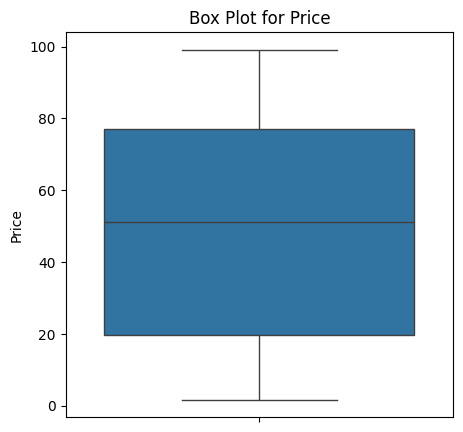

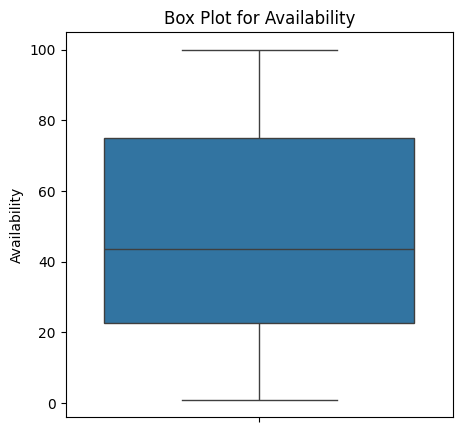

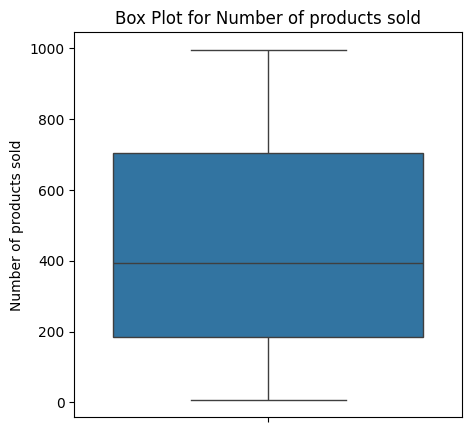

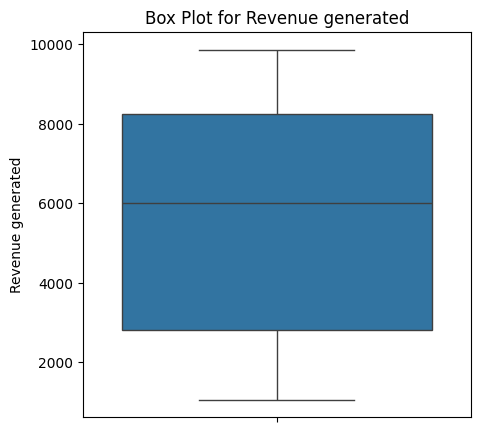

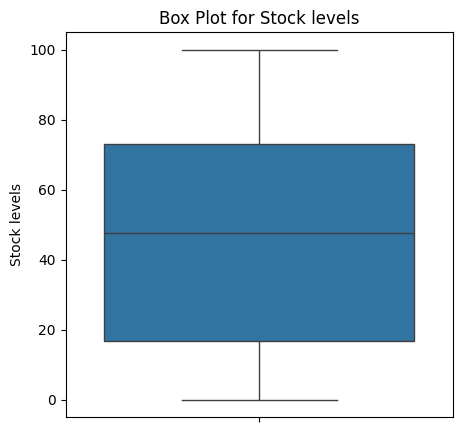

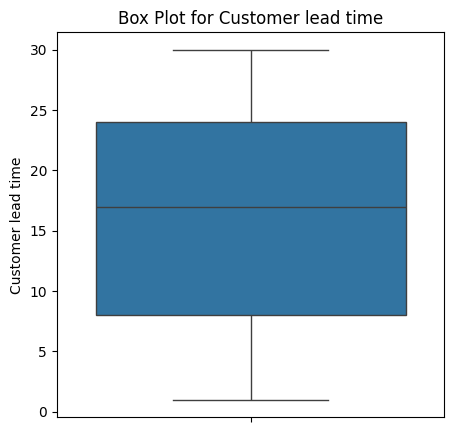

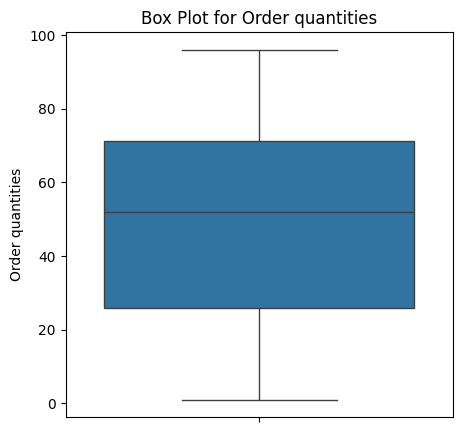

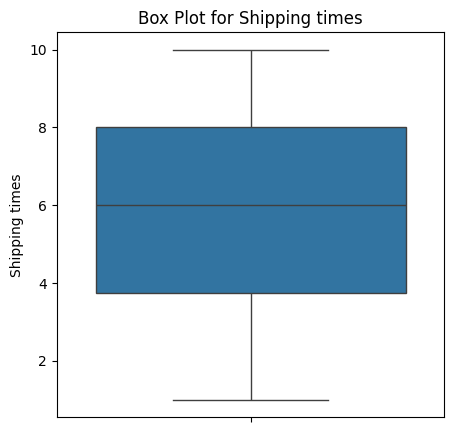

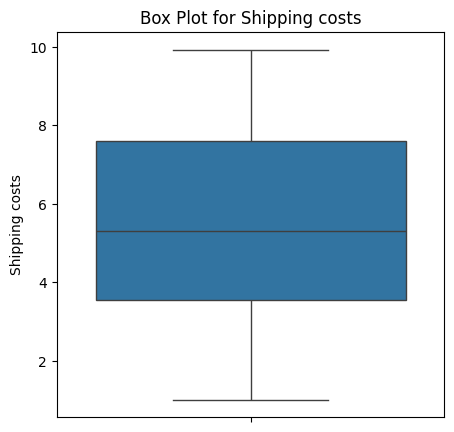

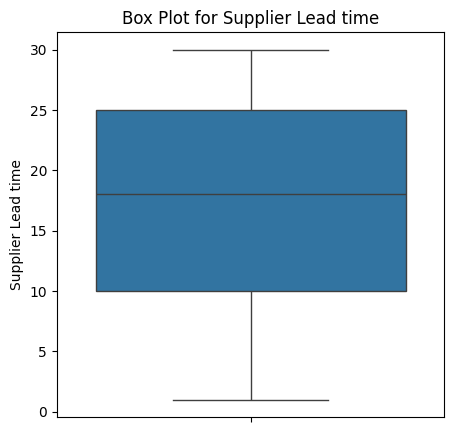

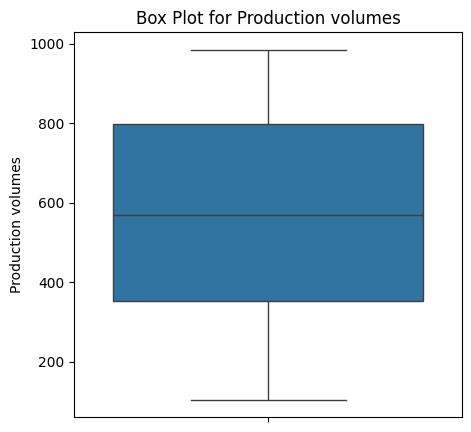

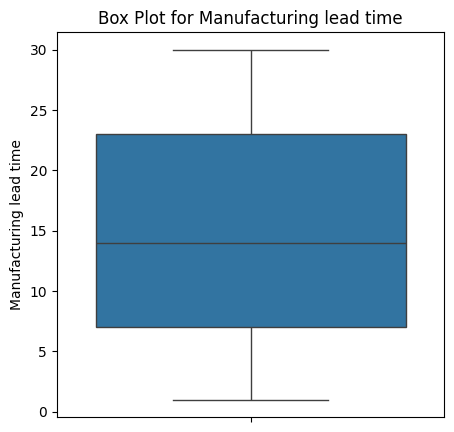

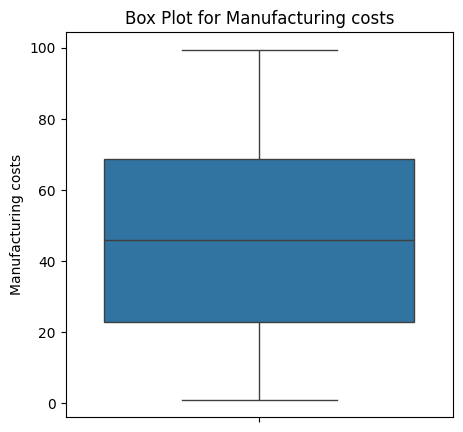

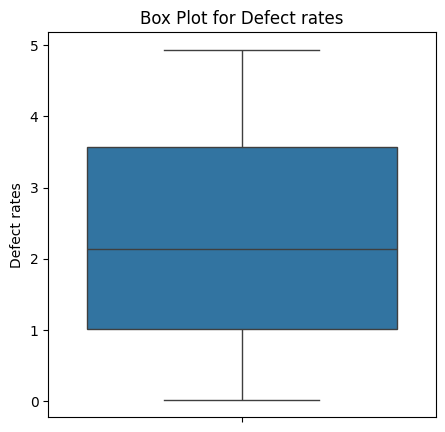

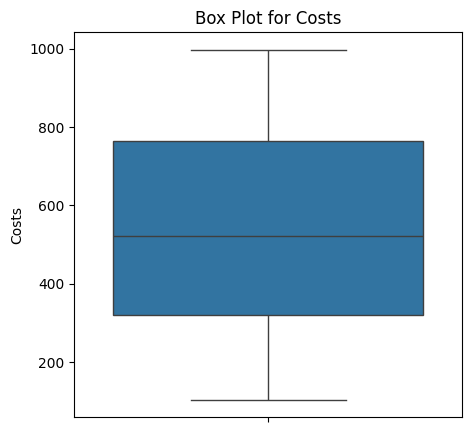

In [34]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [35]:
df.to_csv('supply chain data set new columns.csv')